# Homework part 2 : Albacore metals

Pairs:
12
13
21
23
31
32



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

dataset_name = 'dip-har-eff.csv'
name = dataset_name.split('.csv')[0]

dataset_df = pd.read_csv("albacore_metal.csv")

# Gather info
dataset_rows = dataset_df.shape[0]

dataset_df = dataset_df.values
dataset_df = dataset_df[np.arange(0, dataset_rows), :]

dataset_X = dataset_df[:,2]
dataset_Y = dataset_df[:,3]
dataset_X_max = np.max(dataset_X)
dataset_Y_max = np.max(dataset_Y)

dataset_X = np.true_divide(dataset_X, dataset_X_max)
dataset_Y = np.true_divide(dataset_Y, dataset_Y_max)


In [10]:
# Functions
def calc_total_Error(row, col):
    return (b1*row+b0 - col)**2

def calc_b0_Error(row, col):
    return (b1*row+b0 - col)

def calc_b1_Error(row, col):
    return (b1*row+b0 - col) * row

# helper wrapper function for us to plug in error function to use
def useErrorFunction(errorFunction, args):
    return errorFunction(*args)
    
def mse(X,Y, errorFunction):
    errorsList = []
    for (row, col) in zip(X,Y):
        val = useErrorFunction(errorFunction, (row, col))
        errorsList.append(val)
    ERROR_MSE = calcMean(errorsList)  
    return ERROR_MSE

def adjustWeight(weight, learn, temp_error):
    return weight - learn * temp_error

def takeRandomBatch(listLen, batchSize):
    return random.sample(range(listLen), batchSize)

def calcMean(results):
    results_sum = sum(results)
    return results_sum / batchSize

# Related to R Squared Error Loss
def calc_predicted(b0, b1, data):
    predicted_vals = map(lambda x: b1*x + b0, data)
    return predicted_vals

def calcSquareDiff(data):
    mean = calcMean(data)
    mean_diff = map(lambda actual: actual - mean, data)
    square_mean_diff = sum(map(lambda val: val**2, mean_diff))
    return square_mean_diff

def calcRSquared(actual, predicted):
    predicted_R_square = calcSquareDiff(predicted)
    actual_R_square = calcSquareDiff(actual)
    print(predicted_R_square)
    print(actual_R_square)
    return predicted_R_square / actual_R_square

 b0: -0.480115967886 b1: 1.00204116182 Error: 0.450597124616
 b0: -0.464453918323 b1: 1.00152540198 Error: 0.438700251218
 b0: -0.451862327679 b1: 0.999170964459 Error: 0.43137052475
 b0: -0.441506249623 b1: 0.995498473873 Error: 0.426465016385
 b0: -0.432780262416 b1: 0.990885278215 Error: 0.422854529184
 b0: -0.42524535419 b1: 0.985604848295 Error: 0.419943459022
 b0: -0.418583163658 b1: 0.979855343021 Error: 0.41741720594
 b0: -0.412562803841 b1: 0.973780319707 Error: 0.415109254786
 b0: -0.407016808683 b1: 0.967483749405 Error: 0.412931201196
 b0: -0.40182369392 b1: 0.961040903281 Error: 0.410835894396
 b0: -0.396895313411 b1: 0.954506245409 Error: 0.408798009081
 b0: -0.392167692249 b1: 0.94791915519 Error: 0.40680379416
 b0: -0.387594380603 b1: 0.941308076191 Error: 0.404845656256
 b0: -0.383141635133 b1: 0.934693524121 Error: 0.402919292463
 b0: -0.378784925432 b1: 0.928090267664 Error: 0.401022168772
 b0: -0.374506401132 b1: 0.921508909608 Error: 0.399152709888
 b0: -0.37029305

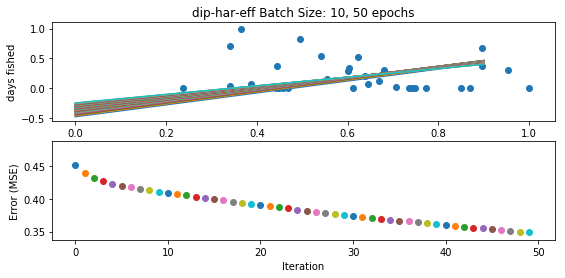

In [12]:
# Start of Regression

# init weights
b1 = 1.0
b0 = -0.5
batchSize = 10
epochs = 50

learn = 0.2

plt.figure(figsize=(9,4))

plt.subplot(211)

plt.xlabel('days fished')
plt.ylabel('days fished')
plt.title(name + ' Batch Size: ' + str(batchSize) + ', ' + str(epochs) + ' epochs')
plt.scatter(dataset_X, dataset_Y)
plt.pause(0.1);

batchSample = takeRandomBatch(len(dataset_X), batchSize)
sample_X = [dataset_X[i] for i in sorted(batchSample)]
sample_Y = [dataset_Y[i] for i in sorted(batchSample)]

batch_epoch_ERRORS = []
for i in range(epochs):
    ERROR = mse(dataset_X, dataset_Y, calc_total_Error)
    batch_epoch_ERRORS.append(ERROR)
    b0_temp_error = mse(sample_X, sample_Y, calc_b0_Error)
    b1_temp_error = mse(sample_X, sample_Y, calc_b1_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    plt.plot (X_test, b1*X_test + b0)
    plt.pause(0.1)

random_effort_vals = np.random.random_sample(batchSize)

predicted = calc_predicted(b0,b1,random_effort_vals)
print('R-Squared: ')
print(calcRSquared(sample_Y, predicted))
   
plt.subplot(212)
plt.xlabel('Iteration')
plt.ylabel('Error (MSE)')

# Plot for error loss
for count, value in enumerate(batch_epoch_ERRORS):
    plt.scatter(count,value)

plt.show()